In [1]:
# IMPLEMENTACION DE Synthetic Minority Oversampling Technique (SMOTE)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from imblearn.over_sampling import  RandomOverSampler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn .metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
%matplotlib inline
datos_url= "C://Users/maxib/Source/repos/proyecto_final_coder/datos/Base_predictive_maintenance.csv"

In [2]:
# Leer .csv y creo un DF
df = pd.read_csv(datos_url, delimiter=",", index_col= ["UDI", "Product_ID"])
df.head()

,,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Target,Failure_Type
UDI,Product_ID,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
# Preparamos variable Target para entrenar los algoritmos.
X= df.drop(["Type","Failure_Type"], axis=1) 
y= df["Failure_Type"]
# instantiating the random over sampler 
ros = RandomOverSampler(sampling_strategy={"Heat Dissipation Failure":1000,"Random Failures":1000,"Tool Wear Failure":1000,
                                            "Overstrain Failure":1000, "Power Failure":1000})
# resampling X, y
X_ros_failure, y_ros_failure = ros.fit_resample(X, y)
y_ros_failure.value_counts()
X_ros_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14652 entries, 0 to 14651
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air_temperature_[K]      14652 non-null  float64
 1   Process_temperature_[K]  14652 non-null  float64
 2   Rotational_speed_[rpm]   14652 non-null  int64  
 3   Torque_[Nm]              14652 non-null  float64
 4   Tool_wear_[min]          14652 non-null  int64  
 5   Target                   14652 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 686.9 KB


In [7]:
X_failure_test= df.drop(["Type","Failure_Type"], axis=1) 
y_failure_test= df["Failure_Type"]

# Binarize the output
y = label_binarize(y_failure_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
y_ros= label_binarize(y_ros_failure, classes=[0, 1, 2, 3, 4, 5])

model= OneVsRestClassifier (svm.SVC(kernel='linear', probability=True,
                                 random_state=0))                              
y_score= model.fit(X_ros_failure, y_ros).decision_function(X_failure_test)

#ROC y AUC
fpr= dict()
tpr= dict()
roc_auc= dict()
nan= float("nan")
for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(y[:,i], y_score[:,i])
    if all(fpr[i]) or all(tpr[i]):
        print(fpr[i])
        print(tpr[i])
        continue
    roc_auc[i] = metrics.roc_auc_score(fpr[i], tpr[i])
print(roc_auc)

[0. 1.]
[nan nan]
[0. 1.]
[nan nan]
[0. 1.]
[nan nan]
[0. 1.]
[nan nan]
[0. 1.]
[nan nan]
[0. 1.]
[nan nan]
{}


In [ ]:
# Graficamos ROC
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [54]:
# Segundo intento
X_failure_test= df.drop(["Type","Failure_Type"], axis=1) 
y_failure_test= df["Failure_Type"]
# Binarize the output
y = label_binarize(y_failure_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
y_ros= label_binarize(y_ros_failure, classes=[0, 1, 2, 3, 4, 5])


# Creamos el modelo
tree_2 = DecisionTreeClassifier(max_depth=8, random_state = 42)
# UNO CONTRA EL RESTO
model = OneVsRestClassifier(tree_2)
# Entrenamos el algoritmo
model.fit(X_ros_failure, y_ros)
# 
y_score = model.predict_proba(X_ros_failure)
# Prediccion en Train
y_train_pred = model.predict(X_ros_failure)
# Prediccion en Test
y_test_pred = model.predict(X_failure_test)
#ROC y AUC
fpr= dict()
tpr= dict()
roc_auc= dict()
nan= float("nan")
for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(y[:,i], y_test_pred[:,i])
    if all(fpr[i]) or all(tpr[i]):
        print(fpr[i])
        print(tpr[i])
        continue
    roc_auc[i] = metrics.roc_auc_score(fpr[i], tpr[i])
y_train_pred = model.predict(X_ros_failure)



[0. 1.]
[nan nan]
[0. 1.]
[nan nan]
[0. 1.]
[nan nan]
[0. 1.]
[nan nan]
[0. 1.]
[nan nan]
[0. 1.]
[nan nan]


In [ ]:
# Graficamos ROC
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

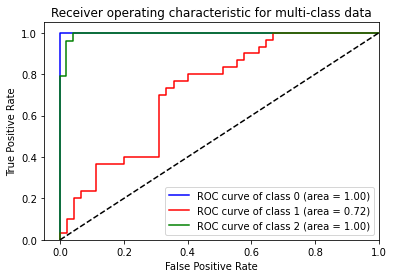

In [18]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(fpr[i])
    print(tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
